# Github Link for IE517 at 2023

https://github.com/kibae-kim/IE-517-ML-in-Fin-Lab-Section-A

# Data Preprocessing

## Split Origial Data into Train and Test Data

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X, y = X_iris[:,:2], y_iris

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33, stratify=y)

In [2]:
print(X_train.shape, y_train.shape)

(112, 2) (112,)


## Feature Scaling of data matrix X to improve convergent velocity of Stochastic Gradient Descent algorithms 

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Visualization of differently labeled instances  which are belongs to training data

/var/folders/vj/kdrj5g3x2v1drg6lzgtdwxb80000gn/T/ipykernel_9284/2601393576.py:10: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_train_std[:,0][y_train == label],


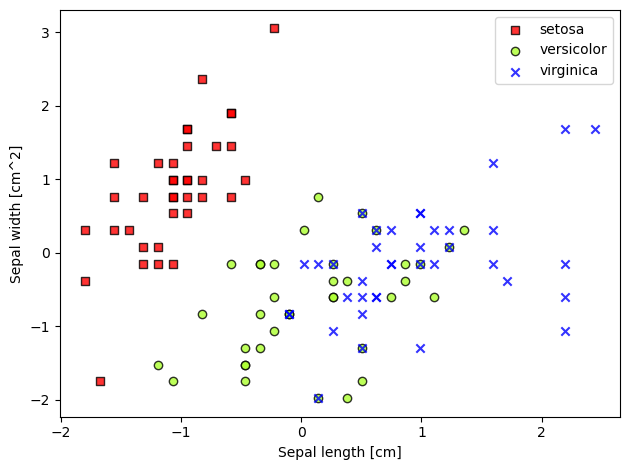

In [4]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['red', 'greenyellow', 'blue']
markers = ['s', 'o', 'x']
labelSet = np.unique(y_iris)
num_labels = len(labelSet)

for i, label in enumerate(labelSet):
    plt.scatter(x=X_train_std[:,0][y_train == label],
               y=X_train_std[:,1][y_train == label],
               alpha=0.8,
               color=colors[i],
               marker=markers[i],
               label = label,
               edgecolor = 'black')
    
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm^2]')
plt.legend(iris.target_names)
plt.tight_layout()

# ML Model Section and Hyperparamter Tuning

In [5]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train_std, y_train)

SGDClassifier()

## Show numerical value of Hyperparamters

In [6]:
model.coef_

array([[-29.51596577,  14.80153843],
       [ -2.47353346,  -4.81336586],
       [ 16.53300234,  -4.88532633]])

In [7]:
model.intercept_

array([-22.17931856,  -6.77449785,  -3.99424429])

# Visualization of Decision Boundary function between one class versus the rest

In [8]:
resolution = 0.5
X1_min, X1_max = X_train_std[:,0].min()-0.5, X_train_std[:,0].max()+0.5
X2_max, X2_min = X_train_std[:,1].min()-0.5, X_train_std[:,1].max()+0.5
X1 = np.arange(X1_min, X1_max, resolution)

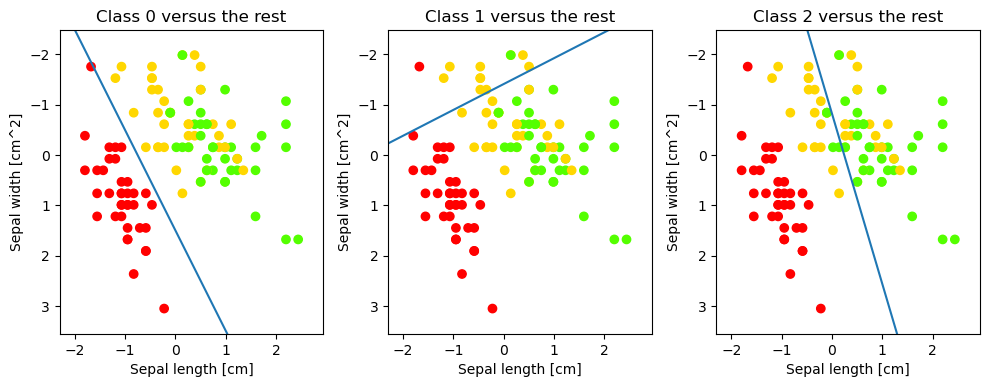

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

for i, label in enumerate(labelSet):
    
    # Set up basic figure information
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length [cm]')
    axes[i].set_ylabel('Sepal width [cm^2]')
    axes[i].set_xlim(X1_min, X1_max)
    axes[i].set_ylim(X2_min, X2_max)
    
    # scatter plot of instances belongs to each class
    axes[i].scatter(x=X_train_std[:,0],y=X_train_std[:,1],
                c=y_train,
               cmap=plt.cm.prism)
    
    # Draw Boundary Decesion
    # ML model have already been trained
    X2 = (-model.intercept_[i] - 
         X1 * model.coef_[i, 0]) / model.coef_[i, 1]
    axes[i].plot(X1, X2)
    plt.tight_layout()

In [29]:
model.predict(sc.transform([[4.7, 3.1]]))

array([0])

In [30]:
model.decision_function(sc.transform([[4.7, 3.1]]))

array([[ 21.27191339,  -3.60335009, -28.06839751]])

# Evalutationg ML Model Performance

## Accuracy of model upon training dataset

In [43]:
from sklearn.metrics import accuracy_score

# Predicted class label
y_train_pred = model.predict(X_train_std)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.7946428571428571

## Accuracy of model upon test dataset

In [44]:
# Predicted class label
y_pred = model.predict(X_test_std)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.7368421052631579

In [57]:
from sklearn import metrics

names = iris.target_names
data = metrics.classification_report(y_test, y_pred,
                                    target_names=names)
print(data)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.67      0.46      0.55        13
   virginica       0.56      0.75      0.64        12

    accuracy                           0.74        38
   macro avg       0.74      0.74      0.73        38
weighted avg       0.75      0.74      0.73        38



In [58]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  6,  7],
       [ 0,  3,  9]])

# Academic Integrity Instruction

In [1]:
print("My name is Kibae Kim")
print("My NetID is: kibaek2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Kibae Kim
My NetID is: kibaek2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
